In [57]:
import cv2
import numpy as np
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
import matplotlib.pyplot as plt

In [58]:
modelPath = "models/custom_dataset_p_0.25_25000.torch"  # Path to trained model

# imageName = 'FLIR_20220906_104014_048-Visual.jpeg' # 'FLIR_20220906_102026_232-Visual.jpeg' # 
# imagePath = "../../Media/Images/original_leg_day/" + imageName  # Test image

imageName = 'PXL_20230208_042446197.jpg' # 'FLIR_20220906_102026_232-Visual.jpeg' # 
imagePath = "../../Skin_Anatomical_Image_Dataset/Image/photo_set_1/" + imageName  # Test image

height=width=900
transformImg = tf.Compose([tf.ToPILImage(), tf.Resize((height, width)), tf.ToTensor(),tf.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))])  # tf.Resize((300,600)),tf.RandomRotation(145)])#

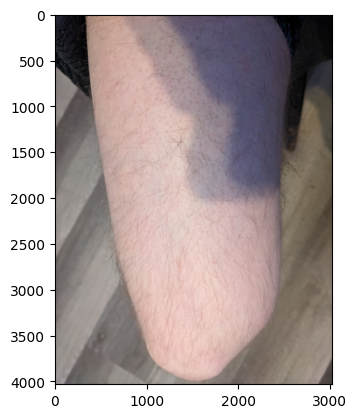

In [59]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')  # Check if there is GPU if not set trainning to CPU (very slow)
Net = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)  # Load net
Net.classifier[4] = torch.nn.Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))  # Change final layer to 3 classes
Net = Net.to(device)  # Set net to GPU or CPU
Net.load_state_dict(torch.load(modelPath)) # Load trained model
Net.eval() # Set to evaluation mode
Img = cv2.imread(imagePath) # load test image
height_orgin , widh_orgin ,d = Img.shape # Get image original size 
plt.imshow(Img[:,:,::-1])  # Show image
plt.show()
Img = transformImg(Img)  # Transform to pytorch
Img = torch.autograd.Variable(Img, requires_grad=False).to(device).unsqueeze(0)
with torch.no_grad():
    Prd = Net(Img)['out']  # Run net

(4032, 3024)
0 1
(4032, 3024, 3)


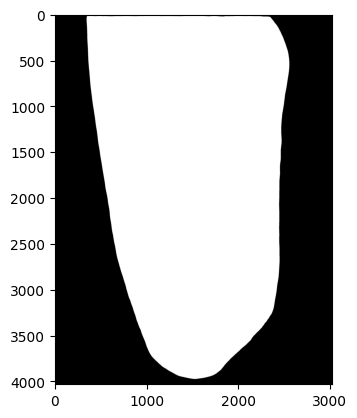

True

<Figure size 640x480 with 0 Axes>

In [60]:
Prd = tf.Resize((height_orgin,widh_orgin))(Prd[0]) # Resize to origninal size
seg = torch.argmax(Prd, 0).cpu().detach().numpy()  # Get  prediction classes

print(seg.shape)
print(seg.min(), seg.max())
seg[seg == 1] = 255
seg = seg[..., np.newaxis]
seg = np.concatenate((seg, seg, seg),2)

print(seg.shape)

plt.imshow(seg)  # display image
plt.show()
plt.savefig('Predictions/' + imageName)
cv2.imwrite('Predictions/' + imageName, seg)
